## Bayesian Experimental Design of Soft X-Ray Crystal Spectroscopy of Sight

Using INDICA, we have generated several emission distributions for the same flat topic equilibrium from ST-40.

<img width="90%" src="/Users/ethanhargrove/Desktop/repos/uncertainty-engine-sdk/uncertainty_engine_client/Screenshot 2025-02-11 at 9.59.00 pm.png">

We wish to identify the best three lines of sight from a fan of an x-ray camera system from the 20 candidate lines of sight (left).

<img width="90%" src="/Users/ethanhargrove/Desktop/repos/uncertainty-engine-sdk/uncertainty_engine_client/Screenshot 2025-02-11 at 10.10.30 pm.png">

The <strong><i>best</i></strong> sensor configuration is the one that maximises the <strong>E</strong>xpected <strong>I</strong>nformation <strong>G</strong>ain (EIG) from those sensors' measurements.

With our new framework, this can be achieved in 5 easy steps.
<ol> 
    <li>Basic setup</li>
    <li>Define dataset and measurement uncertainty</li>
    <li>Setup the designer</li>
    <li>Suggest a sensor design</li>
    <li>Examine suggested designs</li>
</ol>

### 1. Basic setup

First let's import and install all the packages we'll need.<br/>
We have hidden this code, but it can be seen by clicking 'Show code'.

In [1]:
# Click '▷' to import packages
from bed_client import Designer
import numpy as np
import pandas as pd

/Users/ethanhargrove/Desktop/repos/uncertainty-engine-sdk/.venv/lib/python3.12/site-packages/typeguard/__init__.py:1016: UserWarning: no type annotations present -- not typechecking workflow_types.vector_store.VectorStoreManager.connect
  warn('no type annotations present -- not typechecking {}'.format(function_name(func)))


### 2. Define dataset and measurement uncertainty

This data-driven approach relies on samples of simulated sensor readings for each candidate sensor configuration. These samples are provided to the framework as a pandas DataFrame imported from a CSV file.

A sensor configuration may vary the physical attributes of the sensor, such as its location or angle, but it can also encompass variations in precision or entirely different types of sensors measuring distinct quantities.

For this demonstration, each candidate sensor configuration corresponds to a unique line of sight. In the DataFrame, each row represents simulated readings at a specific time, while each column corresponds to a simulated sensor.

In [2]:
sensor_df = pd.read_csv(
    "LOS_demo_data.csv"
)
sensor_df

,LOS_0_0,LOS_0_1,LOS_0_2,LOS_0_3,LOS_0_4,LOS_0_5,LOS_0_6,LOS_0_7,LOS_0_8,LOS_0_9,LOS_0_10,LOS_0_11,LOS_0_12,LOS_0_13,LOS_0_14,LOS_0_15,LOS_0_16,LOS_0_17,LOS_0_18,LOS_0_19
0,126083.529963,126303.698848,126431.013860,126469.947093,126437.430911,126317.921522,126120.021730,125864.080519,125581.628427,125235.747870,124861.310341,124418.774644,123950.068844,123437.668436,122885.087738,122278.617807,121635.273254,120948.922662,120269.321939,119522.332487
1,126626.635217,126854.791769,126988.860422,127033.268508,127005.184336,126888.854287,126693.128194,126438.403393,126156.025736,125809.042155,125432.600901,124986.966918,124514.468807,123997.556143,123439.394512,122826.281666,122175.476985,121481.242934,120793.094855,120036.986462
2,127167.397814,127403.592540,127544.462267,127594.387056,127570.772384,127457.654974,127264.130677,127010.644224,126728.355833,126380.279223,126001.837979,125553.104227,125076.807451,124555.372820,123991.614086,123371.837413,122713.547967,122011.403878,121314.675933,120549.416257
3,127705.833935,127950.117011,128097.834970,128153.318064,128134.210166,128024.338519,127833.043951,127580.817631,127298.633233,126949.473531,126569.036001,126117.200997,125637.099218,125111.132940,124541.761006,123915.299708,123249.501007,122539.420449,121834.080311,121059.637207
4,128242.462284,128494.968554,128649.677107,128710.767002,128696.115734,128589.457564,128400.369089,128149.396790,127867.295237,127517.099639,127134.702318,126679.797223,126195.901927,125665.412863,125090.374313,124457.197628,123783.852077,123065.789466,122351.800764,121568.107092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,173105.591854,178190.418794,185855.923299,195822.242080,208575.232416,222401.603391,236295.436263,248040.427814,254053.078552,253697.292946,250757.856836,247253.316252,240056.311991,226861.109301,212019.476551,198795.471059,187256.365367,177671.833346,170538.693035,165268.524937
998,172988.857868,178020.446096,185640.342516,195581.700430,208331.198391,222166.932478,236087.284936,247865.838651,253894.286562,253531.577174,250585.090618,247079.101721,239871.988711,226648.608468,211786.299155,198556.150284,187024.393812,177466.478467,170374.505302,165150.748305
999,172872.818298,177851.041192,185425.155166,195341.416336,208087.328052,221932.354516,235879.208302,247691.346039,253735.593763,253365.939752,250412.403675,246904.965399,239687.748155,226436.186299,211553.233593,198317.006647,186792.686856,177261.527790,170210.852606,165033.625346
1000,172757.474241,177682.209611,185210.371113,195101.402632,207843.635850,221697.884765,235671.221069,247516.963322,253577.012959,253200.394043,250239.809656,246730.920823,239503.604011,226223.857381,211320.294551,198078.054003,186561.256686,177056.990462,170047.740348,164917.157616


Let's define the standard deviation of our sensor measurements to be 5% of the median measurement. When optimising real-world sensors, consult each candidate sensor's datasheet for its precision or uncertainty.

In [3]:
sigma = float(0.05 * np.median(sensor_df.values))
sigma

11771.072769960936

### 3. Setup the designer

To access this cloud tool, your registered email is required. If you have not been registered speak to a member of the team for assistance.

In [4]:
email = "ethan@digilab.ai"  # ENTER YOUR EMAIL HERE
designer = Designer(email=email, observables=sensor_df, sigma=sigma)

### 4. Get suggested sensor designs

Define the number of sensors you wish to place and how many different sensor sets you wish to evaluate. Using a genetic algorithm, sensor sets are intelligently selected for evaluation.

The top 5 of the evaluated sensor sets is returned for examination.

Let's suggest some 3-sensor sets after evaluating 100 different sets.<br/><br/>
(This should take approximately 4 minutes)

In [5]:
suggestions = designer.suggest(num_sensors=3, num_eval=100)
suggestions

{('LOS_0_1', 'LOS_0_8', 'LOS_0_11'): {'mean_score': 1.7398151316387755,
  'score_var': 0},
 ('LOS_0_1', 'LOS_0_11', 'LOS_0_19'): {'mean_score': 1.7348216727297496,
  'score_var': 5.1499366270679005e-05},
 ('LOS_0_0', 'LOS_0_11', 'LOS_0_13'): {'mean_score': 1.733882627743252,
  'score_var': 2.0055215191169788e-05},
 ('LOS_0_1', 'LOS_0_7', 'LOS_0_11'): {'mean_score': 1.7313376796871918,
  'score_var': 0},
 ('LOS_0_0', 'LOS_0_10', 'LOS_0_13'): {'mean_score': 1.7265614547710788,
  'score_var': 0.0003659118489628262}}

### 5. Examine suggested designs

Instead of just recommending the 'best' sensor set, we empower you with the insights and tools to make an informed decision yourself.

Let's begin by <strong>visualising the suggested sensor sets</strong> to build intuition about the features that contribute to higher information gain.

In [6]:
# Line of sight visualisation code here

Next let's <strong>visualise the distribution of Expected Information Gain (EIG) scores</strong> of the evaluated sensor sets, providing valuable insights for decision-making:

<ol>
    <li><strong>Cluster Identification:</strong> Identify clusters of high-performing sets for further examination</li>
    <li><strong>Distribution Width:</strong> A narrow distribution suggests flexibility, while a broad one signals the need for careful placement.</li>
    <li><strong>Decision Confidence:</strong> Gain confidence in the robustness of a chosen sensor set based on its position relative to other evaluated sets.</li>
</ol>

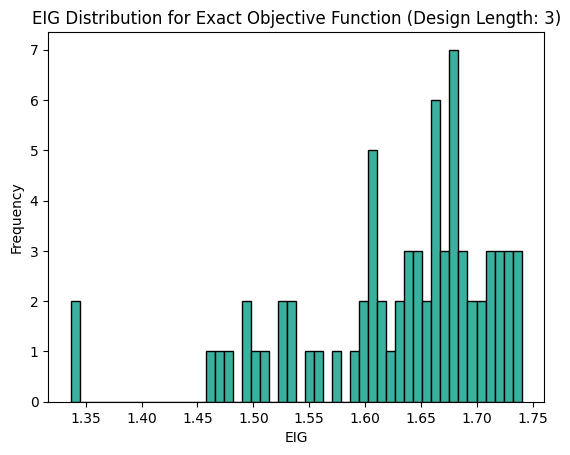

In [7]:
designer.visualise_score_distribution()

Now let's perform some <strong>redundancy analysis</strong> on the suggested designs. This helps:

<ol>
    <li><strong>Resilience Assessment:</strong> Determine how resilient a sensor set is to failure. If performance drops significantly when a sensor is removed, the system is less robust.</li>
    <li><strong>Failure Tolerance:</strong> Allows you to assess which set can better tolerate individual sensor failures.</li>
    <li><strong>Critical Sensor Identification:</strong> Identify the most critical sensors, helping prioritize maintenance or redundancy planning.</li>
</ol>

In [8]:
# Redundancy analysis code here

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, RadioButtons, SelectMultiple

# Sample data: Different line equations
x = np.linspace(0, 10, 100)
lines = {
    "Line 1: y = x": x,
    "Line 2: y = x^2": x**2,
    "Line 3: y = sin(x)": np.sin(x),
    "Line 4: y = cos(x)": np.cos(x)
}

selected_line_variable = {"value": None}

# Function to update plot based on selection
def plot_line(selected_line):
    plt.figure(figsize=(8, 6))
    y = lines[selected_line]
    plt.plot(x, y, label=selected_line, linewidth=2, color='blue')
    plt.title(f"Plot of {selected_line}", fontsize=16)
    plt.xlabel("x", fontsize=14)
    plt.ylabel("y", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

    selected_line_variable["value"] = selected_line

# Create a radio button widget
radio_buttons = RadioButtons(
    options=list(lines.keys()),
    description="Select Line:",
    layout={'width': 'max-content'}  # Make the label larger
)

# Use the interact function to link the widget with the plot
interact(plot_line, selected_line=radio_buttons)

interactive(children=(RadioButtons(description='Select Line:', layout=Layout(width='max-content'), options=('L…

<function __main__.plot_line(selected_line)>

In [16]:
selected_line_variable

{'value': 'Line 3: y = sin(x)'}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, SelectMultiple

# Sample data: Different line equations
x = np.linspace(0, 10, 100)
lines = {
    "Line 1: y = tan(x) / 10": np.tan(x) / 10,
    "Line 2: y = sin(x)": np.sin(x) / 1.1,
    "Line 3: y = cos(x)": np.cos(x) / 1.1,
    "Line 4: y = tan(x) / 10": np.tan(x) / 10.1,
    "Line 5: y = sin(x)": np.sin(x) / 1.25,
    "Line 6: y = cos(x)": np.cos(x) / 1.25,
    "Line 7: y = tan(x) / 10": np.tan(x) / 10.25,
    "Line 8: y = sin(x)": np.sin(x) / 0.9,
    "Line 9: y = cos(x)": np.cos(x) / 0.9,
    "Line 10: y = tan(x) / 10": np.tan(x) / 9.9,
    "Line 11: y = sin(x)": np.sin(x) / 0.8,
    "Line 12: y = cos(x)": np.cos(x) / 0.8,
    "Line 13: y = tan(x) / 10": np.tan(x) / 9.8,
    "Line 14: y = sin(x)": np.sin(x) / 0.7,
    "Line 15: y = cos(x)": np.cos(x) / 0.7,
    "Line 16: y = tan(x) / 10": np.tan(x) / 9.3,
    "Line 17: y = sin(x)": np.sin(x+0.33) ,
    "Line 18: y = cos(x)": np.cos(x+0.33),
    "Line 19: y = tan(x) / 10": np.tan(x+0.33) / 10,
    "Line 20: y = sin(x)": np.sin(x-0.492),
}

# Function to update the plot based on multiple selections
def plot_multiple_lines(selected_lines):
    if not selected_lines:
        print("No lines selected")
        return
    
    plt.figure(figsize=(6, 3))
    
    for line in selected_lines:
        y = lines[line]
        plt.plot(x, y, label=line, linewidth=2)
    
    plt.title("Plot of Selected Lines", fontsize=16)
    plt.xlabel("x", fontsize=14)
    plt.ylabel("y", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print currently selected lines
    print(f"Currently selected: {', '.join(selected_lines)}")

# Create a SelectMultiple widget for multiple selection
multi_select = SelectMultiple(
    options=list(lines.keys()),
    description="Select Lines:",
    # layout={'width': 'max-content', "height": f"{17*20}px"}, 
    rows=len(list(lines.keys())),
    value=list(lines.keys())[0:3],
)

# Use the interact function to link the widget with the plot function
interact(plot_multiple_lines, selected_lines=multi_select)


interactive(children=(SelectMultiple(description='Select Lines:', index=(0, 1, 2), options=('Line 1: y = tan(x…

<function __main__.plot_multiple_lines(selected_lines)>